__Задача 1__

Контрольная работа состоит из пяти вопросов.На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X)

Случайная величина распределена по биномиальному закону, где n = 5 - количество вопросов, вероятность p = 1/4. 
Распределение находится по формуле Бернулли 
$C_n^k p^k (1 - p)^{n - k}$

In [48]:
import math
import numpy as np


def num_of_successes(n, k):
    return math.factorial(n)/(math.factorial(k) * math.factorial(n - k))


def bernulli(p, n, k):
    """Формула Бернулли"""
    
    C_kn = num_of_successes(n, k)
    return C_kn * (p**k) * (1 - p)**(n - k)


In [59]:
 """p = 0.25
n = 5
probabilities = np.array((bernulli(k=i, n=n, p=p) for i in range(6)))"""

In [66]:
plist = []
for i in range(6):
    pr = bernulli(k=i, n=n, p=p)
    plist.append(pr)
    
probabilities = np.array(plist)

__Получили вероятности по формуле Бернулли:__

In [67]:
print(probabilities)

[0.23730469 0.39550781 0.26367188 0.08789062 0.01464844 0.00097656]


In [68]:
import pandas as pd
values = np.array([0, 1, 2, 3, 4, 5])

z=pd.DataFrame({'value': values, 'probability': probabilities})
z.head(10)                  

,value,probability
0,0,0.237305
1,1,0.395508
2,2,0.263672
3,3,0.087891
4,4,0.014648
5,5,0.000977


Найдем мат.ожидание

In [70]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [76]:
z_probabilities = z.groupby('value')['probability'].sum()

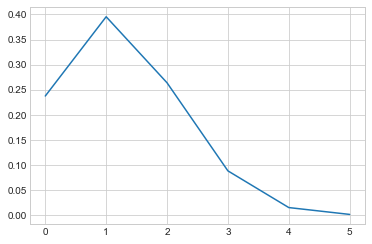

In [77]:
plt.plot(z_probabilities)

Сохраним в перенеменную x_values количество возможных исходов

In [79]:
x_values = np.arange(0, 6)

print(x_values)

[0 1 2 3 4 5]


Чтобы посчитать математическое ожидание, нужно поэлементно перемножить значения массива x_values и массива с вероятностями probabilities (первый с первым, второй со вторым и т.д.), затем сложить результаты:

__Мат. ожидание равно__

In [81]:
m = (x_values * probabilities).sum()

print(m)

1.25


Посчитаем Дисперсию

__Дисперсией__ случайной величины $X$ называется математическое ожидание квадрата отклонения случайной величины от её математического ожидания:
$$D(X) = M \left( (X - M(X))^2 \right).$$

Дисперсия является мерой разброса случайной величины относительно её среднего значения. 

Определим сначала $X - M(X)$. Она будет принимать значения:

In [85]:
y_values = x_values - m
print(y_values)

[-1.25 -0.25  0.75  1.75  2.75  3.75]


Возведем в степень

In [86]:
z_values = y_values ** 2
print(z_values)

[ 1.5625  0.0625  0.5625  3.0625  7.5625 14.0625]


__Дисперсия равна__


In [87]:
d = (z_values * probabilities).sum()

print(d)

0.9375
